In [2]:
from LibLv1 import *
is_gpu_available()

TensorFlow version: 2.10.0
GPU disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
GPU 0 est activé avec gestion dynamique de la mémoire.


True

In [ ]:
data_dir = r'dataset_categorical'
image_h = 224
image_w = 224
batch_s = 32
image_size = (image_h, image_w)  
save_model_path = r"models/Custom_multi_best_weights.h5"


 Fichier ignoré (pas une image) : dataset_categorical\Schematics\desktop.ini
Found 41399 files belonging to 5 classes.
Using 33120 files for training.
Found 41399 files belonging to 5 classes.
Using 8279 files for validation.
Classes détectées : ['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


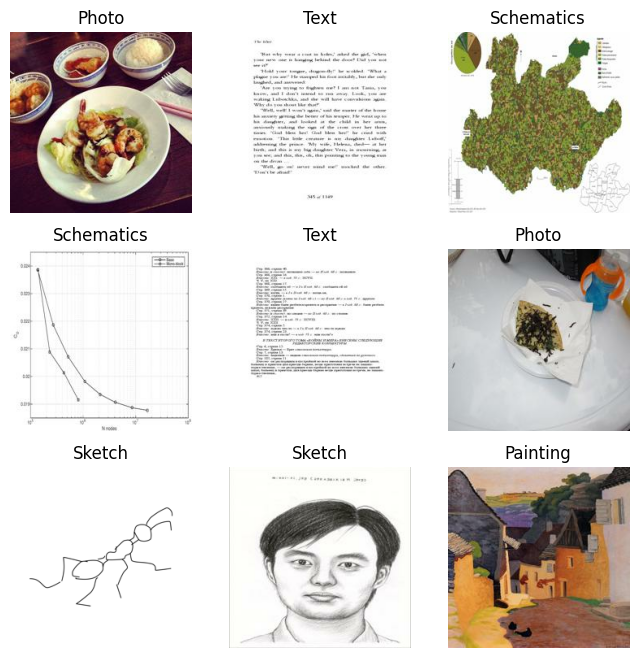

In [4]:
preprocess_images(data_dir)
# Jeu d'entraînement (80% des données)
train_set, test_set = prepare_data(data_dir)
class_names = test_set.class_names
print("Classes détectées :", class_names)

plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):  
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8"))  
        plt.title(class_names[labels[i].numpy()])  
        plt.axis("off") 
plt.show()

Verifier les classes :

In [5]:
model = Create_Sequential((image_h , image_w  , 3 ) , len(class_names)  , ShowSummary=True, dropOut=0.3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                          

In [6]:
with tf.device('/GPU:1'):
    history = TrainModel(
    model=model,
    train_set=train_set,
    test_set=test_set,
    nbEpochs=100,
    UseEarlyStopping=True , 
    modelCheckpoint=save_model_path
    )

Erreur lors du chargement des poids : Cannot assign value to variable ' dense_1/kernel:0': Shape mismatch.The variable shape (256, 5), and the assigned value shape (256, 2) are incompatible.
Epoch 1/100
1035/1035 [==============================] - ETA: 0s - loss: 0.6441 - accuracy: 0.7688
Epoch 1: val_loss improved from inf to 0.40625, saving model to models\Custom_Bin_best_weights.h5
1035/1035 [==============================] - 811s 778ms/step - loss: 0.6441 - accuracy: 0.7688 - val_loss: 0.4063 - val_accuracy: 0.8519
Epoch 2/100
1035/1035 [==============================] - ETA: 0s - loss: 0.4416 - accuracy: 0.8276
Epoch 2: val_loss improved from 0.40625 to 0.39234, saving model to models\Custom_Bin_best_weights.h5
1035/1035 [==============================] - 989s 956ms/step - loss: 0.4416 - accuracy: 0.8276 - val_loss: 0.3923 - val_accuracy: 0.8480
Epoch 3/100
1035/1035 [==============================] - ETA: 0s - loss: 0.3945 - accuracy: 0.8461
Epoch 3: val_loss did not improve from

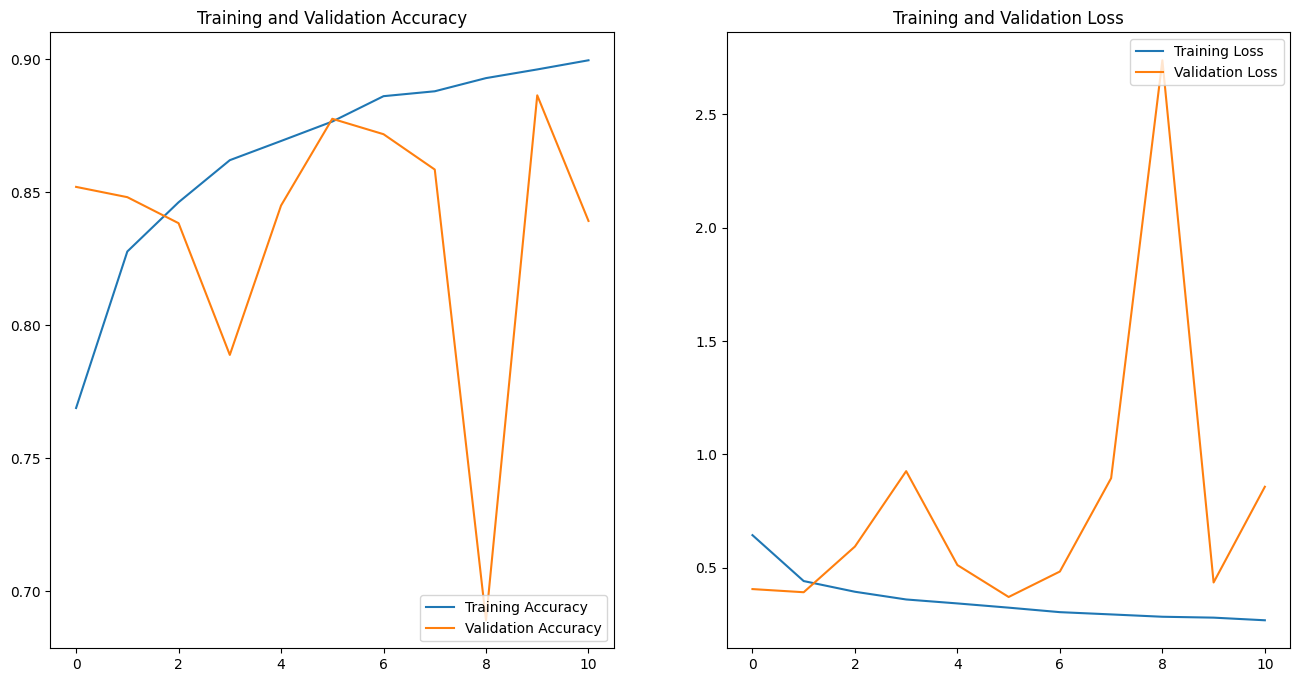

In [7]:
displayHistoryData(history.history['accuracy'] , history.history['val_accuracy'] , history.history['loss'], history.history['val_loss'] , len(history.history['accuracy'])) 

1/1 [==============================] - 0s 112ms/step
Vérification des lignes (%): [100. 100. 100. 100. 100.]


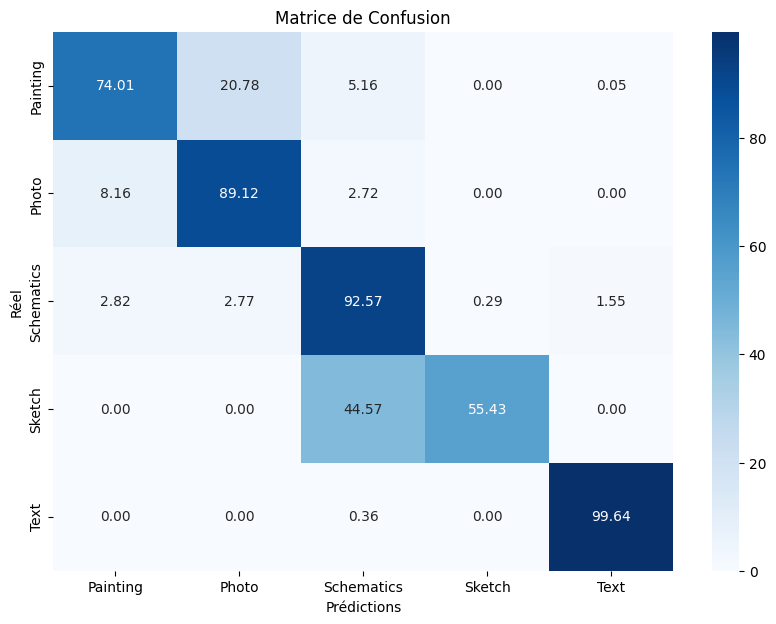

In [8]:
plot_confusion_matrix(model ,test_set , class_names)

In [9]:
with tf.device('/GPU:1'):
    test_model(model, test_set, "lorenzo.jpg", class_names  , image_size )
    test_model(model, test_set, "result/output.png", class_names , image_size)
    test_model(model, test_set, "image.png", class_names , image_size)
    test_model(model, test_set, "result/WhatsApp Image 2025-04-08 à 10.02.35_b655e5ba.jpg", class_names , image_size)
    test_model(model, test_set, "result/WhatsApp Image 2025-04-08 à 10.02.35_e55ae64f.jpg", class_names , image_size)

259/259 [==============================] - 12s 45ms/step - loss: 0.3714 - accuracy: 0.8775
Évaluation sur le jeu de test - Accuracy: 0.88, Loss: 0.3714


FileNotFoundError: [Errno 2] No such file or directory: 'lorenzo.jpg'